In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [44]:
all_out = glob("out/**/*.pkl")

In [45]:
all_out = [load_pickle(p) for p in all_out]

In [46]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
rf_results = []
gpr_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['num_train_points'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['xgb']['accuracy'], 
        'f1_macro': out['xgb']['f1_macro'],
        'f1_micro': out['xgb']['f1_micro'],
        'kappa': out['xgb']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['tabpfn']['accuracy'], 
        'f1_macro': out['tabpfn']['f1_macro'],
        'f1_micro': out['tabpfn']['f1_micro'],
        'kappa': out['tabpfn']['kappa'],
        "num_classes": out['num_classes']
    }


    rf_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['rf']['accuracy'], 
        'f1_macro': out['rf']['f1_macro'],
        'f1_micro': out['rf']['f1_micro'],
        'kappa': out['rf']['kappa'],
        "num_classes": out['num_classes']
    }
    
    gpr_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['gpr']['accuracy'], 
        'f1_macro': out['gpr']['f1_macro'],
        'f1_micro': out['gpr']['f1_micro'],
        'kappa': out['gpr']['kappa'],
        "num_classes": out['num_classes']
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    rf_results.append(rf_res)
    gpr_results.append(gpr_res)

In [47]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
rf_res = pd.DataFrame(rf_results)
gpr_res = pd.DataFrame(gpr_results)

In [48]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std'])

In [49]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [50]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [51]:
grouped_rf_res = rf_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [52]:
grouped_gpr_res = gpr_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [53]:
grouped_res.loc[2,:]

frac_valid      accuracy            f1_macro  \
                                mean  std     mean       std      mean   
representation train_size                                                
InChI          10                1.0  0.0    0.534  0.042426  0.448722   
               50                1.0  0.0    0.522  0.065054  0.516480   
               100               1.0  0.0    0.526  0.019799  0.525934   
               200               1.0  NaN    0.560       NaN  0.557166   
SELFIES        10                1.0  0.0    0.524  0.016971  0.511665   
               50                1.0  0.0    0.486  0.036770  0.480596   
               100               1.0  0.0    0.546  0.053740  0.545200   
               200               1.0  NaN    0.588       NaN  0.587201   
SMILES         10                1.0  0.0    0.506  0.002828  0.492468   
               50                1.0  0.0    0.574  0.048083  0.573917   
               100               1.0  0.0    0.576  0.045255  0.572656   
               200               1.0  0.0    0.586  0.002828  0.584122   

                                    f1_micro            kappa            
                                std     mean       std   mean       std  
representation train_size                                                
InChI          10          0.150700    0.534  0.042426  0.068  0.084853  
               50          0.059924    0.522  0.065054  0.044  0.130108  
               100         0.019882    0.526  0.019799  0.052  0.039598  
               200              NaN    0.560       NaN  0.120       NaN  
SELFIES        10          0.007073    0.524  0.016971  0.048  0.033941  
               50          0.035645    0.486  0.036770 -0.028  0.073539  
               100         0.053512    0.546  0.053740  0.092  0.107480  
               200              NaN    0.588       NaN  0.176       NaN  
SMILES         10          0.013424    0.506  0.002828  0.012  0.005657  
               50          0.048059    0.574  0.048083  0.148  0.096167  
               100         0.049948    0.576  0.045255  0.152  0.090510  
               200         0.000511    0.586  0.002828  0.172  0.005657

In [54]:
grouped_tabpfn_res

accuracy            f1_macro           f1_micro  \
                           mean       std      mean       std     mean   
num_classes train_size                                                   
2           10            0.566  0.019718  0.560097  0.014212    0.566   
            50            0.568  0.008764  0.567091  0.009284    0.568   
            100           0.592  0.017527  0.589072  0.016740    0.592   
            200           0.619  0.010000  0.617832  0.012337    0.619   

                                  kappa            
                             std   mean       std  
num_classes train_size                             
2           10          0.019718  0.132  0.039436  
            50          0.008764  0.136  0.017527  
            100         0.017527  0.184  0.035054  
            200         0.010000  0.238  0.020000

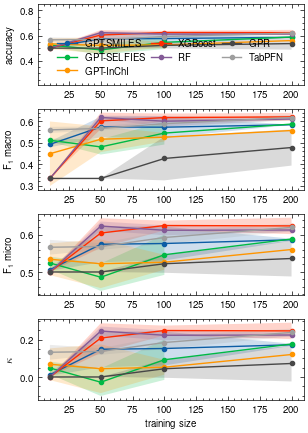

In [55]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] - grouped_res.loc[2, 'SMILES', :][metric]['std'],
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] + grouped_res.loc[2, 'SMILES', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] - grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] + grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'] - grouped_res.loc[2, 'InChI', :][metric]['std'],
        grouped_res.loc[2, 'InChI', :][metric]['mean'] + grouped_res.loc[2, 'InChI', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'],
        marker='o',
        label='XGBoost'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['std'],
        grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rf_res.loc[2,:].index,
        grouped_rf_res.loc[2,:][metric]['mean'],
        marker='o',
        label='RF'
    )
    ax[i].fill_between(
        grouped_rf_res.loc[2,:].index,
        grouped_rf_res.loc[2,:][metric]['mean'] - grouped_rf_res.loc[2,:][metric]['std'],
        grouped_rf_res.loc[2,:][metric]['mean'] + grouped_rf_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_gpr_res.loc[2,:].index,
        grouped_gpr_res.loc[2,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_gpr_res.loc[2,:].index,
        grouped_gpr_res.loc[2,:][metric]['mean'] - grouped_gpr_res.loc[2,:][metric]['std'],
        grouped_gpr_res.loc[2,:][metric]['mean'] + grouped_gpr_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['std'],
        grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=3,columnspacing=.5)
ax[0].set_ylim(0.21,0.85)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('opv-classification_results_2_class.pdf', bbox_inches='tight')

KeyError: 5

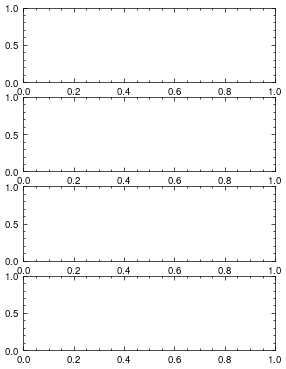

In [57]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] - grouped_res.loc[5, 'SMILES', :][metric]['std'],
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] + grouped_res.loc[5, 'SMILES', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] - grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] + grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'] - grouped_res.loc[5, 'InChI', :][metric]['std'],
        grouped_res.loc[5, 'InChI', :][metric]['mean'] + grouped_res.loc[5, 'InChI', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'],
        marker='o',
        label='XGBoost'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['std'],
        grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rf_res.loc[5,:].index,
        grouped_rf_res.loc[5,:][metric]['mean'],
        marker='o',
        label='RF'
    )
    ax[i].fill_between(
        grouped_rf_res.loc[5,:].index,
        grouped_rf_res.loc[5,:][metric]['mean'] - grouped_rf_res.loc[5,:][metric]['std'],
        grouped_rf_res.loc[5,:][metric]['mean'] + grouped_rf_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_gpr_res.loc[5,:].index,
        grouped_gpr_res.loc[5,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_gpr_res.loc[5,:].index,
        grouped_gpr_res.loc[5,:][metric]['mean'] - grouped_gpr_res.loc[5,:][metric]['std'],
        grouped_gpr_res.loc[5,:][metric]['mean'] + grouped_gpr_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['std'],
        grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=3,columnspacing=.5)
ax[0].set_ylim(0.21,0.85)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('opv-classification_results_2_class.pdf', bbox_inches='tight')